# **`Import des librairies + les paramètres`**

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.formula.api as smf
import statsmodels.api as sm

# **`Chargement + analyses des données`**

In [2]:
# importation des données sur la consommation
energ = pd.read_csv("RTE_energie.csv")

In [3]:
energ.head()

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0


On dispose de plusieurs informations sur la consommation en énergie du territoire français. On a des informations concernant la production totale ainsi que le découpage de ces productions (charbon, fioul, gaz, nucléaire, hydraulique, bioénergies), la consommation totale, le solde exportateur ainsi que les échanges avec des pays voisins avec l'Espagne, le Royaume-Uni, la Suisse, l'Italie, l'Allemagne et la Belgique.

Nous allons nous intéresser sur la consommation totale dans le territoire de la France. De même, nous allons créer une variable contenant le `logarithme` de la variable `Consommation totale` afin de compléter l'analyse de la série temporelle de la consommation.

In [4]:
energ['Territoire'].unique()

array(['France', 'Grand-Est', 'Nouvelle-Aquitaine',
       'Auvergne-Rhéne-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Ile-de-France', 'Occitanie', 'Normandie',
       'Hauts-de-France', 'PACA', 'Pays-de-la-Loire'], dtype=object)

In [5]:
# Données conso uniquement pour la France
conso_france = energ[energ["Territoire"]=="France"]
conso_france.head(10)

,Mois,Qualité,Territoire,Production totale,Production nucléaire,Production thermique totale,Production thermique charbon,Production thermique fioul,Production thermique gaz,Production hydraulique,...,Production bioénergies,Consommation totale,Solde exportateur,Echanges export,Echanges import,Echanges avec le Royaume-Uni,Echanges avec l'Espagne,Echanges avec l'Italie,Echanges avec la Suisse,Echanges avec l'Allemagne et la Belgique
0,2012-01,Données définitives,France,57177,42811.0,5399,741.0,691,3967,6741,...,514,51086,5371.0,7043.0,1672.0,929.0,724.0,1581.0,2195.0,-59.0
1,2012-02,Données définitives,France,54419,38661.0,8721,2511.0,1309,4901,5244,...,454,54476,-715.0,4504.0,5220.0,-798.0,-309.0,1244.0,1579.0,-2430.0
2,2012-03,Données définitives,France,48583,37549.0,5276,1435.0,666,3175,3894,...,531,43156,4888.0,7042.0,2153.0,583.0,330.0,1742.0,2235.0,-1.0
3,2012-04,Données définitives,France,44192,33100.0,3484,1655.0,486,1343,5302,...,405,40176,3447.0,5762.0,2314.0,547.0,-9.0,1271.0,1670.0,-31.0
4,2012-05,Données définitives,France,40433,29058.0,1772,854.0,368,549,7706,...,469,35257,4425.0,6391.0,1965.0,693.0,251.0,1341.0,1060.0,1079.0
5,2012-06,Données définitives,France,37518,26562.0,2219,960.0,384,875,6823,...,437,33219,3648.0,5674.0,2026.0,447.0,482.0,1207.0,599.0,913.0
6,2012-07,Données définitives,France,37910,28818.0,2221,1110.0,437,674,4901,...,513,34141,3216.0,5327.0,2110.0,822.0,494.0,825.0,787.0,287.0
7,2012-08,Données définitives,France,36339,28314.0,2533,1165.0,413,956,3563,...,486,32247,3561.0,5834.0,2273.0,948.0,334.0,610.0,792.0,877.0
8,2012-09,Données définitives,France,38035,30130.0,2450,1382.0,396,671,3641,...,470,33269,4054.0,6036.0,1981.0,1011.0,72.0,790.0,1413.0,769.0
9,2012-10,Données définitives,France,42987,32848.0,3518,2039.0,456,1022,4534,...,450,38628,3625.0,6387.0,2762.0,183.0,-273.0,1621.0,1774.0,321.0


In [6]:
conso_france.rename({'Consommation totale':'conso_totale'}, axis=1, inplace=True)

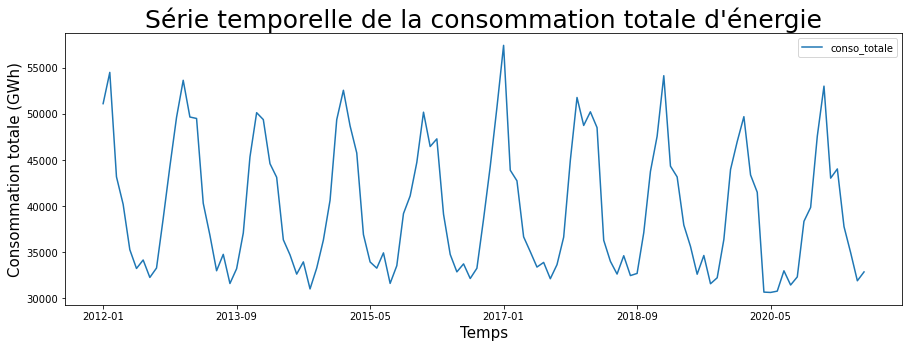

In [7]:
conso_france.plot(x='Mois', y='conso_totale', figsize=(15,5))
plt.xlabel('Temps', fontsize=15)
plt.ylabel('Consommation totale (GWh)', fontsize=15)
plt.title('Série temporelle de la consommation totale d\'énergie', fontsize=25)
plt.show()

In [8]:
# paramètre de tendance centrale
print('Moyenne de la série : ', round(conso_france['conso_totale'].mean(), 2))
print('Médiane de la série : ', round(conso_france['conso_totale'].median(), 2))

# paramètre de dispersion
print('Variance de la série : ', round(conso_france['conso_totale'].var(), 2))
print('Ecart-type de la série : ', round(conso_france['conso_totale'].std(), 2))
print('Etendue de la série : ', round(conso_france['conso_totale'].max() - conso_france['conso_totale'].min(), 2))

Moyenne de la série :  39730.83
Médiane de la série :  37102.0
Variance de la série :  50125123.46
Ecart-type de la série :  7079.91
Etendue de la série :  26784


Nous allons ensuite représenter la série temporelle à l'aide de la variable `log_consommation`. Pour cela, nous allons créer la variable d'abord.

In [9]:
# creation  de la nouvelle variable 'log_conso'
conso_france["log_conso"] = conso_france['conso_totale'].apply(lambda x : np.log(x))

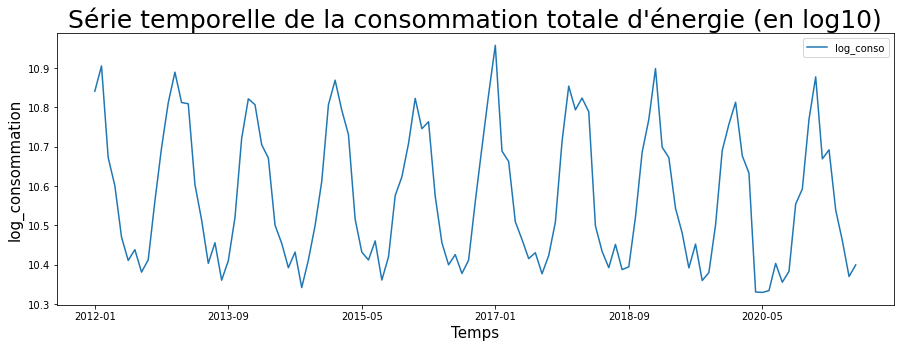

In [10]:
conso_france.plot(x='Mois', y='log_conso',figsize=(15,5))
plt.xlabel('Temps', fontsize=15)
plt.ylabel('log_consommation', fontsize=15)
plt.title('Série temporelle de la consommation totale d\'énergie (en log10)', fontsize=25)
plt.show()

In [11]:
conso_france.columns

Index(['Mois', 'Qualité', 'Territoire', 'Production totale',
       'Production nucléaire', 'Production thermique totale',
       'Production thermique charbon', 'Production thermique fioul',
       'Production thermique gaz', 'Production hydraulique',
       'Production éolien', 'Production solaire', 'Production bioénergies',
       'conso_totale', 'Solde exportateur', 'Echanges export',
       'Echanges import', 'Echanges avec le Royaume-Uni',
       'Echanges avec l'Espagne', 'Echanges avec l'Italie',
       'Echanges avec la Suisse', 'Echanges avec l'Allemagne et la Belgique',
       'log_conso'],
      dtype='object')

In [12]:
conso_france = conso_france[['Mois','conso_totale']]

On remarque que la consommation brute ou transformée par une fonction logarithme ont la même forme. 

Nous allons maintenant explorer les données DJU.

## Données météo utilisées pour corriger les données de l'effet température</font>

Ces datasets ont été téléchargés sur le [lien](https://cegibat.grdf.fr/simulateur/calcul-dju) pour les données de chaque station.

In [13]:
df_DJU_H1a = pd.read_excel("Datasets/df_dju_H1a.xlsx")
df_DJU_H1b = pd.read_excel("Datasets/df_dju_H1b.xlsx")
df_DJU_H1c = pd.read_excel("Datasets/df_dju_H1c.xlsx")
df_DJU_H2a = pd.read_excel("Datasets/df_dju_H2a.xlsx")
df_DJU_H2b = pd.read_excel("Datasets/df_dju_H2b.xlsx")
df_DJU_H2c = pd.read_excel("Datasets/df_dju_H2c.xlsx")
df_DJU_H2d = pd.read_excel("Datasets/df_dju_H2d.xlsx")
df_DJU_H3 = pd.read_excel("Datasets/df_dju_H3.xlsx")

In [14]:
df_DJU_H1a

,Unnamed: 0,JAN,FÉV,MAR,AVR,MAI,JUN,JUI,AOÛ,SEP,OCT,NOV,DÉC,Total
0,2021,460.2,358.5,333.6,317.5,199.6,13.1,0.0,0.0,0.0,0.0,0.0,0.0,1682.4
1,2020,387.4,310.9,333.4,159.6,132.0,50.6,23.9,18.0,57.7,194.7,279.4,388.2,2335.6
2,2019,460.1,322.4,294.4,232.0,191.3,49.2,21.0,22.4,79.0,176.6,335.6,385.9,2569.5
3,2018,362.1,473.4,381.4,168.2,97.3,40.1,1.4,21.7,83.2,183.3,322.7,379.1,2513.4
4,2017,529.4,331.5,269.3,273.3,110.8,24.6,14.7,24.5,112.7,157.8,339.0,414.8,2602.2
5,2016,415.1,363.3,373.8,278.8,133.4,61.0,23.5,21.4,37.9,233.1,345.1,452.3,2738.3
6,2015,444.3,410.9,340.9,220.4,167.1,69.1,27.8,16.9,129.7,229.2,249.8,284.5,2590.3
7,2014,372.9,322.9,297.5,191.7,150.2,56.4,20.1,55.3,51.1,131.9,274.9,421.9,2346.3
8,2013,498.1,454.1,450.1,272.2,218.1,83.7,15.9,21.1,91.8,155.7,346.0,396.1,3002.6
9,2012,398.1,497.8,274.3,291.4,137.7,82.6,43.3,13.9,109.1,202.8,338.0,394.4,2783.1


In [15]:
## fonction pour renommer les colonnes
def renom(df):
    df.rename({'Unnamed: 0':'Année','JAN':'-01', 'FÉV':'-02', 'MAR':'-03', 'AVR':'-04', 'MAI':'-05', 'JUN':'-06',
               'JUI':'-07', 'AOÛ':'-08', 'SEP':'-09', 'OCT':'-10','NOV':'-11', 'DÉC':'-12'}, axis=1, inplace=True)
    return df

In [16]:
df_DJU_H1a = renom(df_DJU_H1a)
df_DJU_H1b = renom(df_DJU_H1b)
df_DJU_H1c = renom(df_DJU_H1c)
df_DJU_H2a = renom(df_DJU_H2a)
df_DJU_H2b = renom(df_DJU_H2b)
df_DJU_H2c = renom(df_DJU_H2c)
df_DJU_H2d = renom(df_DJU_H2d)
df_DJU_H3 = renom(df_DJU_H3)

In [17]:
## fonction pour convertir dans un nouveau DF
def decr(df):
    names = df.columns[1:-1]
    df = pd.melt(df, id_vars=['Année'], value_vars=names, var_name= 'mois', value_name="dju")
    return df

In [18]:
df_DJU_H1a = decr(df_DJU_H1a)
df_DJU_H2a = decr(df_DJU_H2a)
df_DJU_H1b = decr(df_DJU_H1b)
df_DJU_H2b = decr(df_DJU_H2b)
df_DJU_H1c = decr(df_DJU_H1c)
df_DJU_H2c = decr(df_DJU_H2c)
df_DJU_H2d = decr(df_DJU_H2d)
df_DJU_H3 = decr(df_DJU_H3)

df_DJU_H1a.head()

,Année,mois,dju
0,2021,-01,460.2
1,2020,-01,387.4
2,2019,-01,460.1
3,2018,-01,362.1
4,2017,-01,529.4


In [19]:
df_final_DJU = df_DJU_H1a
df_final_DJU['dju_H2a'] = df_DJU_H2a['dju']
df_final_DJU['dju_H1b'] = df_DJU_H1b['dju']
df_final_DJU['dju_H2b'] = df_DJU_H2b['dju']
df_final_DJU['dju_H1c'] = df_DJU_H1c['dju']
df_final_DJU['dju_H2c'] = df_DJU_H2c['dju']
df_final_DJU['dju_H2d'] = df_DJU_H2d['dju']
df_final_DJU['dju_H3'] = df_DJU_H3['dju']

df_final_DJU.head()

,Année,mois,dju,dju_H2a,dju_H1b,dju_H2b,dju_H1c,dju_H2c,dju_H2d,dju_H3
0,2021,-01,460.2,350.5,495.4,381.7,493.1,362.6,424.3,286.7
1,2020,-01,387.4,306.4,411.7,294.8,422.4,277.5,375.8,218.6
2,2019,-01,460.1,350.2,484.5,379.9,490.0,367.0,414.9,281.9
3,2018,-01,362.1,297.5,379.1,276.5,323.7,265.9,316.7,201.8
4,2017,-01,529.4,372.9,567.3,423.2,583.7,413.6,442.5,274.1


In [20]:
df_final_DJU['Année'] = df_final_DJU['Année'].astype(str)

In [21]:
df_final_DJU['Mois'] = df_final_DJU['Année'].str.cat(df_final_DJU['mois'])

In [22]:
df_final_DJU

,Année,mois,dju,dju_H2a,dju_H1b,dju_H2b,dju_H1c,dju_H2c,dju_H2d,dju_H3,Mois
0,2021,-01,460.2,350.5,495.4,381.7,493.1,362.6,424.3,286.7,2021-01
1,2020,-01,387.4,306.4,411.7,294.8,422.4,277.5,375.8,218.6,2020-01
2,2019,-01,460.1,350.2,484.5,379.9,490.0,367.0,414.9,281.9,2019-01
3,2018,-01,362.1,297.5,379.1,276.5,323.7,265.9,316.7,201.8,2018-01
4,2017,-01,529.4,372.9,567.3,423.2,583.7,413.6,442.5,274.1,2017-01
...,...,...,...,...,...,...,...,...,...,...,...
151,2013,-12,396.1,303.2,437.2,351.7,432.6,338.0,367.8,220.9,2013-12
152,2012,-12,394.4,300.7,422.5,307.4,413.0,284.6,420.5,256.8,2012-12
153,2011,-12,361.2,285.6,395.9,276.0,390.1,260.0,360.4,202.4,2011-12
154,2010,-12,599.2,435.5,601.9,436.6,514.8,408.3,464.3,300.4,2010-12


In [23]:
df_final_DJU.rename(columns={'dju':'dju_H1a'}, inplace=True)
df_final_DJU.drop(columns=['Année','mois'], inplace=True)
df_final_DJU.head()

,dju_H1a,dju_H2a,dju_H1b,dju_H2b,dju_H1c,dju_H2c,dju_H2d,dju_H3,Mois
0,460.2,350.5,495.4,381.7,493.1,362.6,424.3,286.7,2021-01
1,387.4,306.4,411.7,294.8,422.4,277.5,375.8,218.6,2020-01
2,460.1,350.2,484.5,379.9,490.0,367.0,414.9,281.9,2019-01
3,362.1,297.5,379.1,276.5,323.7,265.9,316.7,201.8,2018-01
4,529.4,372.9,567.3,423.2,583.7,413.6,442.5,274.1,2017-01


In [24]:
df_final_DJU['DJU_moy'] = (df_final_DJU['dju_H1a']+ df_final_DJU['dju_H2a']+df_final_DJU['dju_H1b']+df_final_DJU['dju_H2b']+df_final_DJU['dju_H1c']+ df_final_DJU['dju_H2c'] + df_final_DJU['dju_H2d'] + df_final_DJU['dju_H3'])/8
df_final_DJU

,dju_H1a,dju_H2a,dju_H1b,dju_H2b,dju_H1c,dju_H2c,dju_H2d,dju_H3,Mois,DJU_moy
0,460.2,350.5,495.4,381.7,493.1,362.6,424.3,286.7,2021-01,406.8125
1,387.4,306.4,411.7,294.8,422.4,277.5,375.8,218.6,2020-01,336.8250
2,460.1,350.2,484.5,379.9,490.0,367.0,414.9,281.9,2019-01,403.5625
3,362.1,297.5,379.1,276.5,323.7,265.9,316.7,201.8,2018-01,302.9125
4,529.4,372.9,567.3,423.2,583.7,413.6,442.5,274.1,2017-01,450.8375
...,...,...,...,...,...,...,...,...,...,...
151,396.1,303.2,437.2,351.7,432.6,338.0,367.8,220.9,2013-12,355.9375
152,394.4,300.7,422.5,307.4,413.0,284.6,420.5,256.8,2012-12,349.9875
153,361.2,285.6,395.9,276.0,390.1,260.0,360.4,202.4,2011-12,316.4500
154,599.2,435.5,601.9,436.6,514.8,408.3,464.3,300.4,2010-12,470.1250


In [25]:
df_final_DJU['Mois'] = df_final_DJU['Mois'].apply(pd.to_datetime, format='%Y-%m')

Nous avons à présent notre jeu de données final DJU.

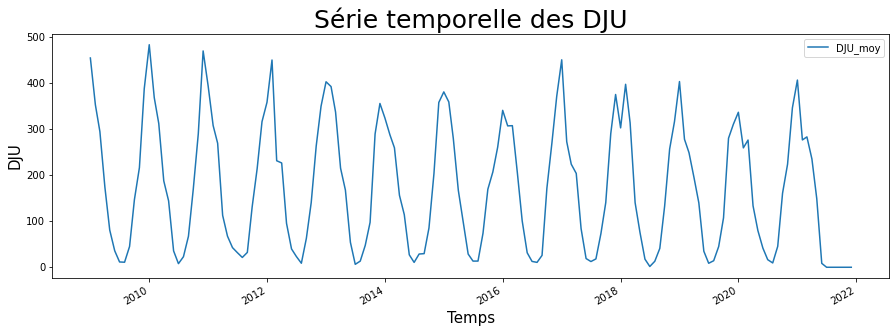

In [26]:
# graphique de la série
df_final_DJU.plot(x='Mois',y='DJU_moy', figsize=(15,5))
plt.xlabel('Temps', fontsize=15)
plt.ylabel('DJU', fontsize=15)
plt.title('Série temporelle des DJU', fontsize=25)
plt.show()

La silhouette de la série temporelle des DJU suit celle de la consommation d'énergie électrique.

In [27]:
conso_france['Mois'] = conso_france['Mois'].apply(pd.to_datetime, format='%Y-%m')
df_final = conso_france.merge(df_final_DJU[['Mois','DJU_moy']], on='Mois')
df_final = df_final.set_index('Mois')
df_final.head()

,conso_totale,DJU_moy
Mois,,
2012-01-01,51086,358.6375
2012-02-01,54476,450.3875
2012-03-01,43156,231.4875
2012-04-01,40176,226.6375
2012-05-01,35257,95.4625


#### Distribution de la consommation totale d'électricité

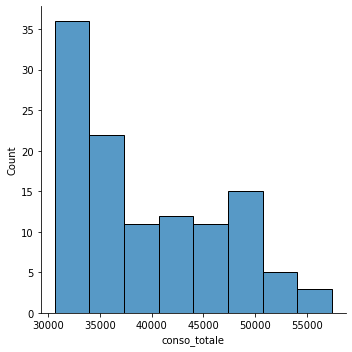

In [28]:
sns.displot(df_final['conso_totale'])
plt.show()

In [29]:
## Vérification si les données sont distribuées selon une loi normale (H0 : les données ont été tirées d'une distribution normale)
st.shapiro(df_final['conso_totale'])

ShapiroResult(statistic=0.9091411232948303, pvalue=9.376966545460164e-07)

#### Distribution des températures en DJU

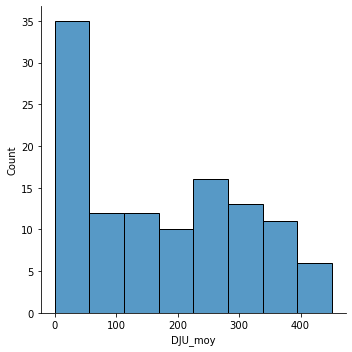

ShapiroResult(statistic=0.9180682301521301, pvalue=2.8770091375918128e-06)

In [30]:
sns.displot(df_final['DJU_moy'])
plt.show()
st.shapiro(df_final['DJU_moy'])

# **Correction et désaisonnalisation des données de consommation**

## `Désaisonnalisation grâce à une régression linéaire`

Pour corriger les données de consommation mensuelles de l'effet température *(dues au chauffage électrique)*, nous allons utiliser une régression linéaire.
Observons d'abord ce que donne le scatter plot de :
- **$X$** = dju_moy
- **$Y$** = conso_totale

Dans ce modèle, nous supposons qu'il existe une **relation linéaire entre la variable à expliquer et la variable explicative** : 

<span style="font-size:18px">$$Y = \alpha + \beta X + \varepsilon $$</span>

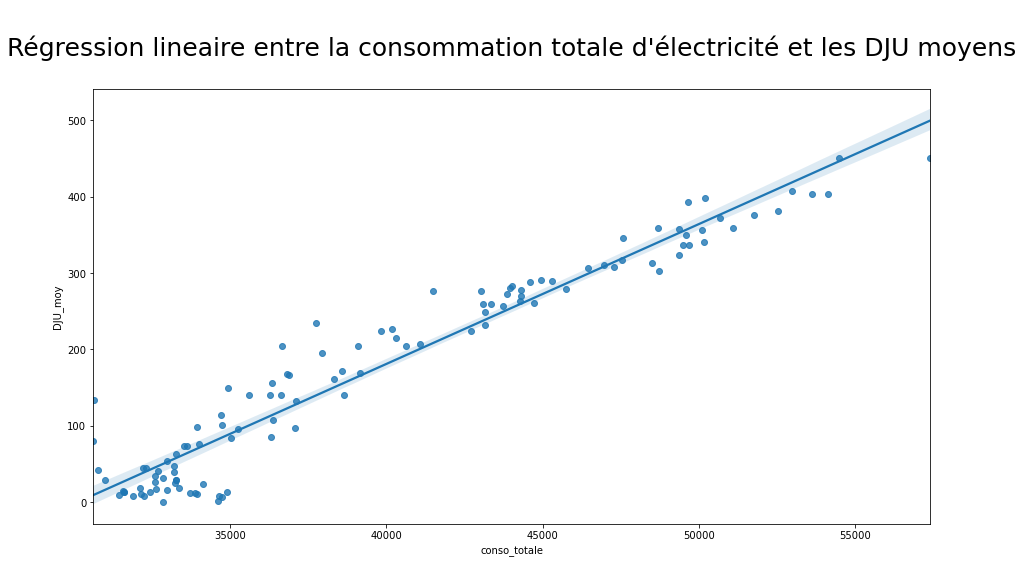

In [31]:
plt.figure(figsize=(15,8))
sns.regplot('conso_totale', 'DJU_moy', data=df_final)
plt.title('\nRégression lineaire entre la consommation totale d\'électricité et les DJU moyens\n', fontsize=25)
plt.show()

In [32]:
reg_conso = smf.ols('conso_totale ~ DJU_moy', data=df_final).fit()
print(reg_conso.summary())

                            OLS Regression Results                            
Dep. Variable:           conso_totale   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     1559.
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           5.96e-68
Time:                        18:15:09   Log-Likelihood:                -1027.2
No. Observations:                 115   AIC:                             2058.
Df Residuals:                     113   BIC:                             2064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.076e+04    285.257    107.822      0.0

Nous obtenons un R$^2$ de `0.93`, ce qui est relativement élévé et au vu de la représentation graphique de notre droite de régression, cela nous indique que le modèle est bon. On peut voir aussi que la variable `DJU_moy` est également statistiquement significative au niveau de test 5% avec un `p-value nulle`.

Nous allons chercher maintenant les paramètres inconnus $\alpha$ et $\beta$ afin de corriger les consommations mensuelles de l'effet de température.

In [33]:
a, b = reg_conso.params
print("a =",a,"\nb =",b)

a = 30757.101388253403 
b = 50.94107668845734


À présent, on peut représenter les valeurs ajustées en fonction des valeurs observées.

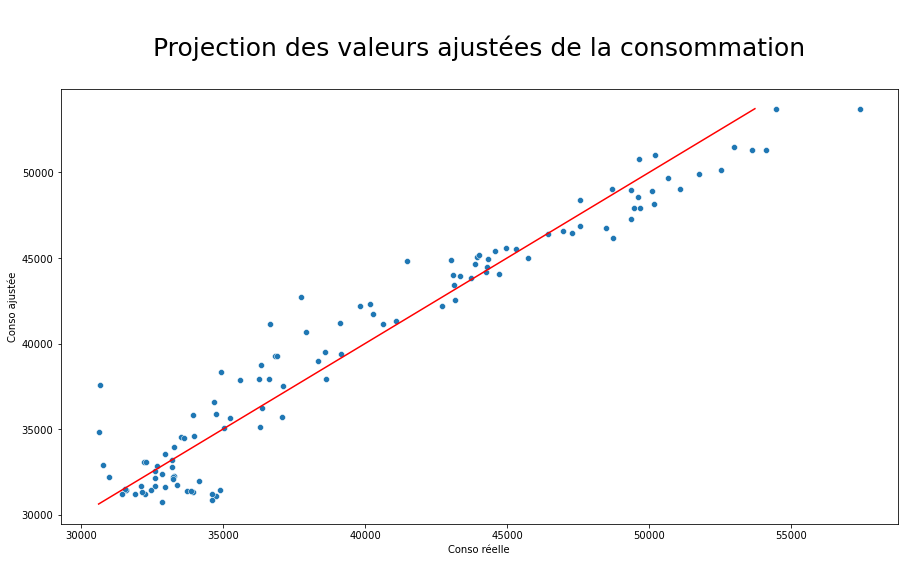

In [34]:
df_final['cons_pred'] = reg_conso.predict()

X_plot = [df_final['conso_totale'].min(), df_final['cons_pred'].max()]

fig = plt.figure(figsize=(15,8))
ax = sns.scatterplot(x="conso_totale", y="cons_pred", data = df_final)
ax.set(xlabel='Conso réelle', ylabel='Conso ajustée')
plt.plot(X_plot, X_plot, color='r')
plt.title("\nProjection des valeurs ajustées de la consommation\n", fontsize=25)
plt.show()

On voit que les points projetés sont proches de la première bissectrice, ce qui indique que les valeurs ajustées sont proches des valeurs réélles.

Vérifions que les résidus sont centrés et homoscédastique(de variance constante) qui sont deux hypothèses fondamentales de la régression linaire.

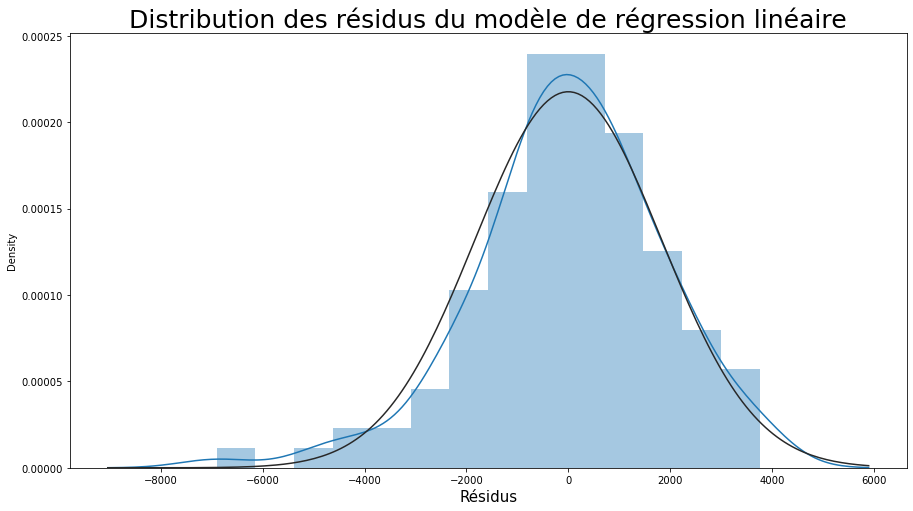

In [35]:
from scipy.stats import norm, shapiro

fig = plt.figure(figsize=(15,8))
ax = sns.distplot(reg_conso.resid, fit = norm)
plt.xlabel('Résidus', fontsize=15)
plt.title("Distribution des résidus du modèle de régression linéaire", fontsize=25)
plt.show()

On remarque donc que la distribution des résidus semble **centrée**.

Nous allons maintenant utiliser les coeffiscients obtenus pour corriger la consommation totale d'énergie des effets de la température :
$$Conso_{corrigée} = Conso -(DJU\_moy * \beta)$$

In [36]:
df_final['conso_tot_cor'] = df_final['conso_totale'] - (df_final['DJU_moy'] * b)
df_final.head()

,conso_totale,DJU_moy,cons_pred,conso_tot_cor
Mois,,,,
2012-01-01,51086,358.6375,49026.481779,32816.619609
2012-02-01,54476,450.3875,53700.325565,31532.775823
2012-03-01,43156,231.4875,42549.323878,31363.777510
2012-04-01,40176,226.6375,42302.259656,28630.841732
2012-05-01,35257,95.4625,35620.063922,30394.037467


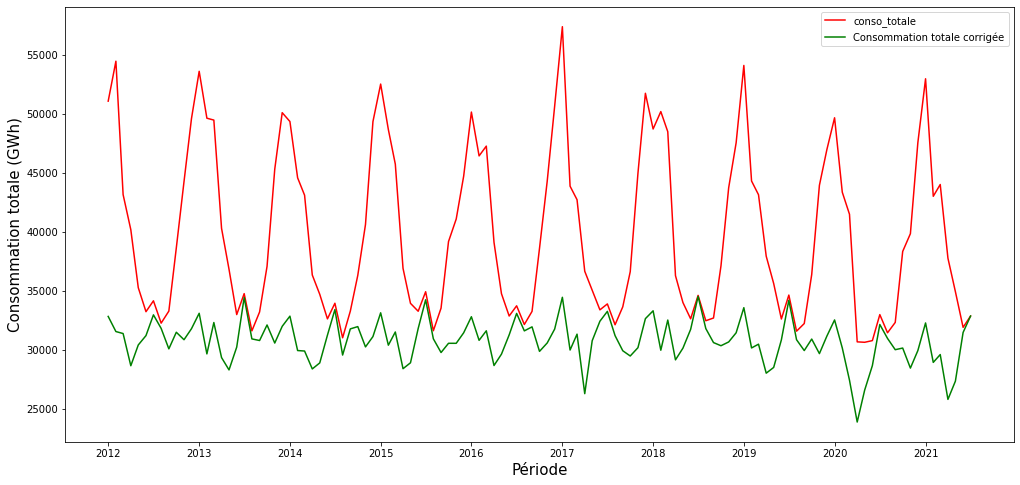

In [37]:
plt.figure(figsize=(17,8))
plt.plot(df_final['conso_totale'], label='conso_totale', color='red')
plt.plot(df_final['conso_tot_cor'], label='Consommation totale corrigée', color='green')
plt.xlabel('Période', fontsize=15)
plt.ylabel('Consommation totale (GWh)', fontsize=15)
plt.legend()
plt.show()

On voit ici clairement l'impact des températures sur les consommation d'énergie au niveau national. Il existe encore sur cette série temporelle corrigée un fort impact saisonnier.

Nous allons donc effectuer une **désaisonnalisation de la consommation corrigée des effets de température par la méthode des moyennes mobiles**.

## `Désaisonnalisation grâce à l'aide des moyennes mobiles`

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

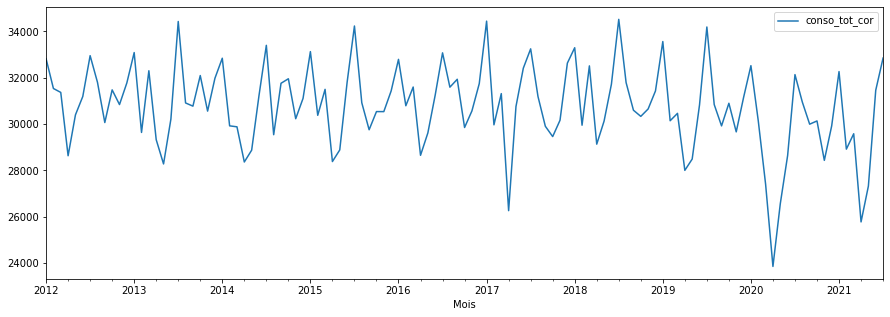

In [39]:
df_final.plot(y="conso_tot_cor", figsize=(15,5));

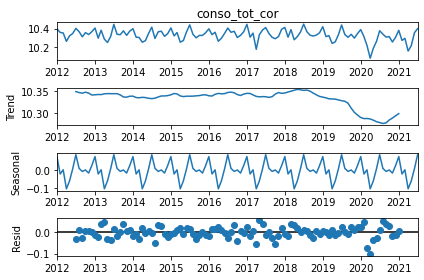

In [40]:
x = df_final["conso_tot_cor"]
y = np.log(x)
decomp_y = seasonal_decompose(y,  model='additive')
decomp_y.plot()
plt.show()

On peut voir sur ce graphique combiné la décomposition de la tendance et de la saisonnalité ainsi que les résidus.

In [41]:
df_decomp_y_seasonal = pd.DataFrame(decomp_y.seasonal)
y_compl = pd.merge(y, df_decomp_y_seasonal, on="Mois")
y_compl["cvs"] = np.exp(y_compl["conso_tot_cor"] - y_compl["seasonal"])
y_compl

,conso_tot_cor,seasonal,cvs
Mois,,,
2012-01-01,10.398690,0.076500,30399.781850
2012-02-01,10.358783,-0.021645,32222.729925
2012-03-01,10.353409,0.002009,31300.824302
2012-04-01,10.262240,-0.105170,31805.993218
2012-05-01,10.322002,-0.060975,32304.972160
...,...,...,...
2021-03-01,10.294845,0.002009,29520.383881
2021-04-01,10.157175,-0.105170,28633.867480
2021-05-01,10.215463,-0.060975,29040.227314


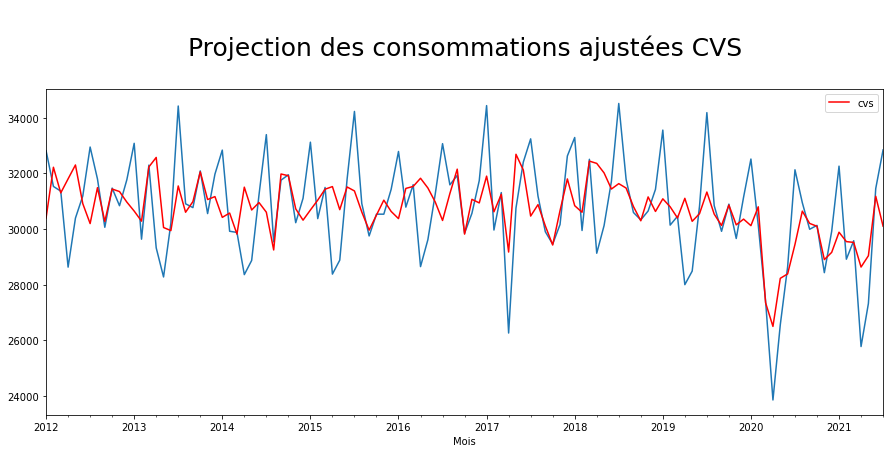

In [42]:
x.plot(figsize=(15,6))
#Plot des valeurs obtenues par CVS des moyennes mobiles
y_compl["cvs"].plot(legend = True, color="r")
plt.title("\nProjection des consommations ajustées CVS\n", fontsize=25)
plt.show()

In [43]:
df_final['Saisonnalité'] = decomp_y.seasonal
df_final['cvs'] = y_compl['cvs']
df_final.head()

,conso_totale,DJU_moy,cons_pred,conso_tot_cor,Saisonnalité,cvs
Mois,,,,,,
2012-01-01,51086,358.6375,49026.481779,32816.619609,0.076500,30399.781850
2012-02-01,54476,450.3875,53700.325565,31532.775823,-0.021645,32222.729925
2012-03-01,43156,231.4875,42549.323878,31363.777510,0.002009,31300.824302
2012-04-01,40176,226.6375,42302.259656,28630.841732,-0.105170,31805.993218
2012-05-01,35257,95.4625,35620.063922,30394.037467,-0.060975,32304.972160


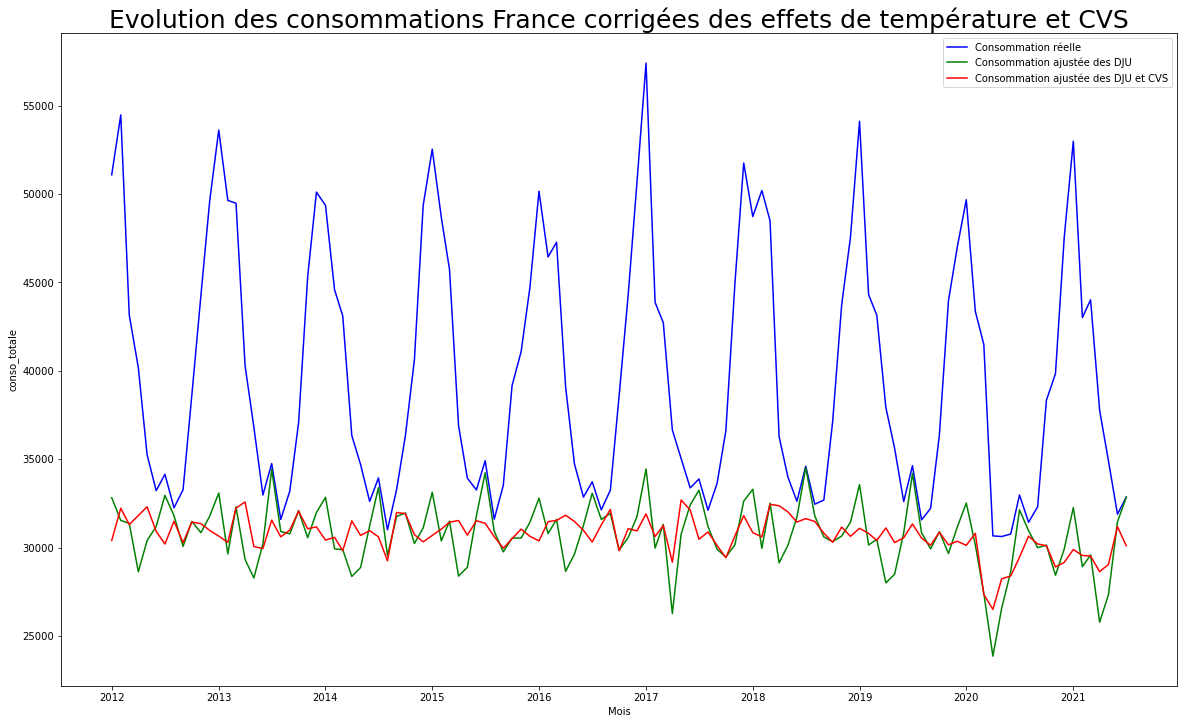

In [44]:
fig = plt.figure(figsize=(20,12))
ax1 = sns.lineplot(data=df_final, x=df_final.index,  y="conso_totale", color="blue", legend='brief', label="Consommation réelle")

ax2 = sns.lineplot(data=df_final, x=df_final.index,  y="conso_tot_cor", color="green", legend='brief', label="Consommation ajustée des DJU")
ax3 = sns.lineplot(data=df_final, x=df_final.index,  y="cvs", color="red", legend='brief', label="Consommation ajustée des DJU et CVS")
plt.title("Evolution des consommations France corrigées des effets de température et CVS", fontsize=25)
plt.show()

# **`Prévision de la consommation`**

## `Méthode de Holt-Winters (lissage exponentiel)`

Dans cette partie, nous allons utiliser la série corrigée des effets de température pour faire la prévision

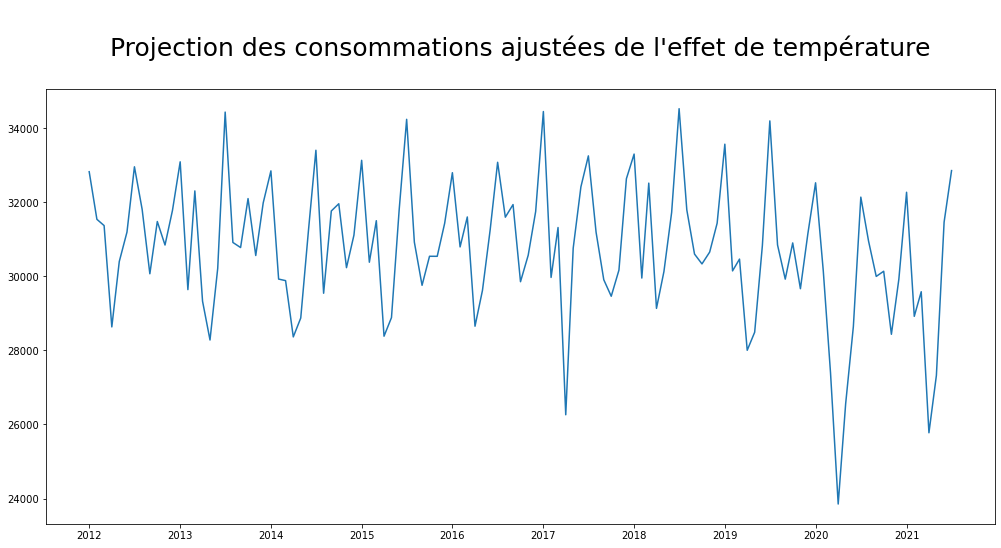

In [45]:
plt.figure(figsize=(17,8))
plt.plot(df_final['conso_tot_cor'], label='Consommation ajustée des effets de température')
plt.title("\nProjection des consommations ajustées de l'effet de température\n", fontsize=25)
plt.show()

Nous allons travailler sur la série de `2012-2019` afin de tenter de prévoir l'année **2020** pour comparer la prévision au données réelles.    
Nous utiliserons la fonction ExponentialSmoothing de Statsmodels :

In [46]:
x_train = x["2012":"2019"]
x_test = x["2020"]
y_train = np.log(x_train)
y_test = np.log(x_test)

In [47]:
from statsmodels.tsa.api import ExponentialSmoothing

hw_ln = ExponentialSmoothing(np.asarray(y_train), seasonal_periods=12, trend='add', seasonal='add').fit()
hw_pred_ln = hw_ln.forecast(12)

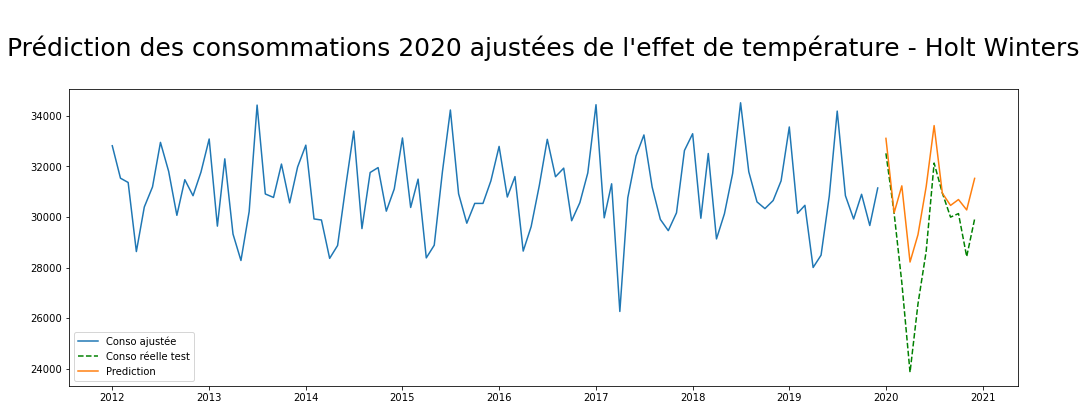

In [48]:
plt.figure(figsize=(17,12))
plt.subplot(211)
plt.plot(x_train, label='Conso ajustée')
plt.plot(x_test, label='Conso réelle test', color="g", linestyle="--")
plt.plot(y_test.index, np.exp(hw_pred_ln), label='Prediction')
plt.title("\nPrédiction des consommations 2020 ajustées de l'effet de température - Holt Winters\n", fontsize=25)
plt.legend()

plt.show()

Nous allons faire un zoom sur la période.

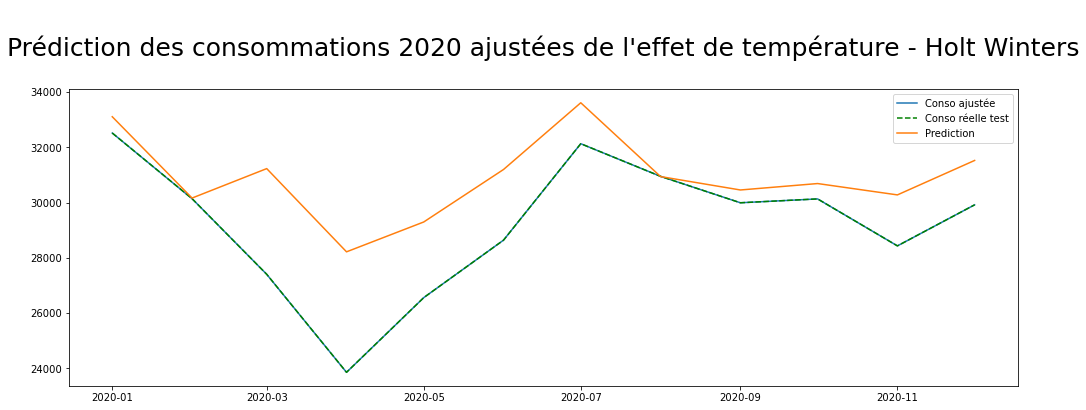

In [49]:
#Zoom
plt.figure(figsize=(17,12))
plt.subplot(212)
plt.plot(x["2020"], label='Conso ajustée')
plt.plot(x_test, label='Conso réelle test', color="g", linestyle="--")
plt.plot(y_test.index, np.exp(hw_pred_ln), label='Prediction')
plt.title("\nPrédiction des consommations 2020 ajustées de l'effet de température - Holt Winters\n", fontsize=25)
plt.legend()
plt.show()

Maintenant, regardons les métriques principales du modèle :

#### `RMSE (Root Mean Square Error) :`
Le critère RMSE se caractérise par la moyenne des carrés des écarts entre les données prédites et les données réelles. C'est de fait une mesure globale de l'exactitude du modèle. Plus la valeur du RMSE est proche de 0, meilleur est le modèle en terme d'exactitude. 

#### `MAPE (Mean Average Percentage Error)`
Erreur relative absolue moyenne.

Pour cela, nous allons définir une fonction comme suit :

In [50]:
#Fonction de calculs des metriques importantes MAE, MSE, MAPE, RMSE, R²
def prin_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    diff = y_true - y_pred
    mae = np.mean(abs(diff))
    mse = np.mean(diff**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs(diff / y_true)) * 100
    r2 = 1-(sum(diff**2)/sum((y_true-np.mean(y_true))**2))
    dict_metrics = {"Métrique":["MAE", "MSE", "RMSE", "MAPE", "R²"], "Résultats":[mae, mse, rmse, mape, r2]}
    df_metrics = pd.DataFrame(dict_metrics)
    return df_metrics

In [51]:
df_metrics_holt_winters = prin_metrics(np.exp(y_test), np.exp(hw_pred_ln))
df_metrics_holt_winters

,Métrique,Résultats
0,MAE,1.672138e+03
1,MSE,4.733161e+06
2,RMSE,2.175583e+03
3,MAPE,6.107950e+00
4,R²,1.295495e-01


## `Méthode SARIMA`

- **`Stationarité de la série`**

Dans un premier temps, nous allons tester la stationnarité de notre série avec le test ADF (Augmented Dickey-Fuller). L'hypothèse nulle du test est que la série temporelle n'est pas stationnaire.

In [52]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

In [53]:
#ADF-test(Série originelle)
res_adf_o = adfuller(x,regression='ct')
print('p-value ADF série originelle :{}'.format(res_adf_o[1]))

p-value ADF série originelle :0.8702349583167672


In [54]:
#ADF-test(Série différenciée)
res_adf_d = adfuller(x.diff().dropna(),regression='c')
print('p-value ADF série différenciée :{}'.format(res_adf_d[1]))

p-value ADF série différenciée :1.650026497856745e-07


Les résultats des tests montrent qu'au seuil de test 5%, `on ne rejette pas l'hypothèse de non-stationnarité de la série`, contrairement à la série différenciée.

Nous allons donc effectuer une stationnarisation de la série.

In [55]:
x_len = len(x)

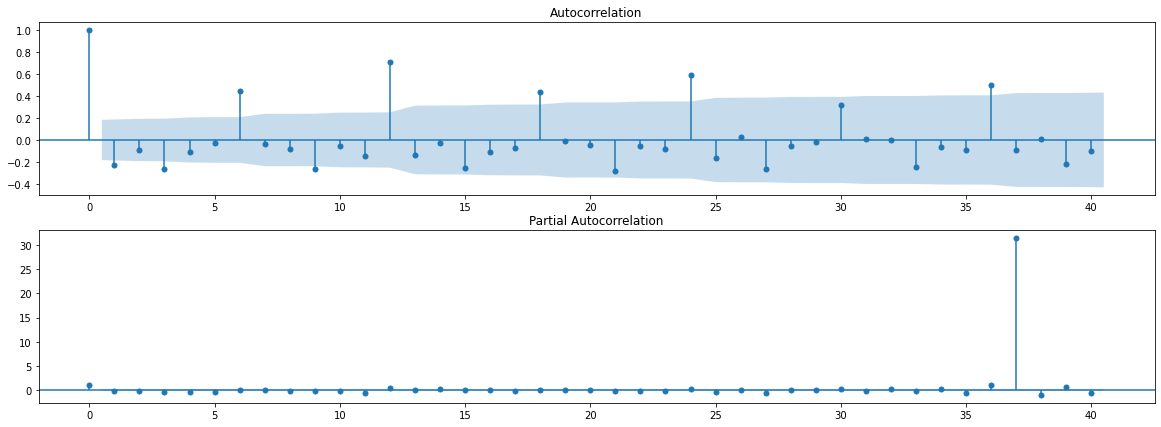

In [56]:
fig,ax = plt.subplots(2,1,figsize=(20,7))
fig = sm.graphics.tsa.plot_acf(x.diff().dropna(), lags=40, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(x.diff().dropna(), lags=40, ax=ax[1])

plt.show()

Les graphes ci-dessus montrent, qu'il y a des pics significatifs dans le graphique ACF au décalage 6, 12, 18 ... *(composante saisonnière semestrielle)*. Nous allons donc les différencier.

In [57]:
x_diff_6 = x.diff(6)

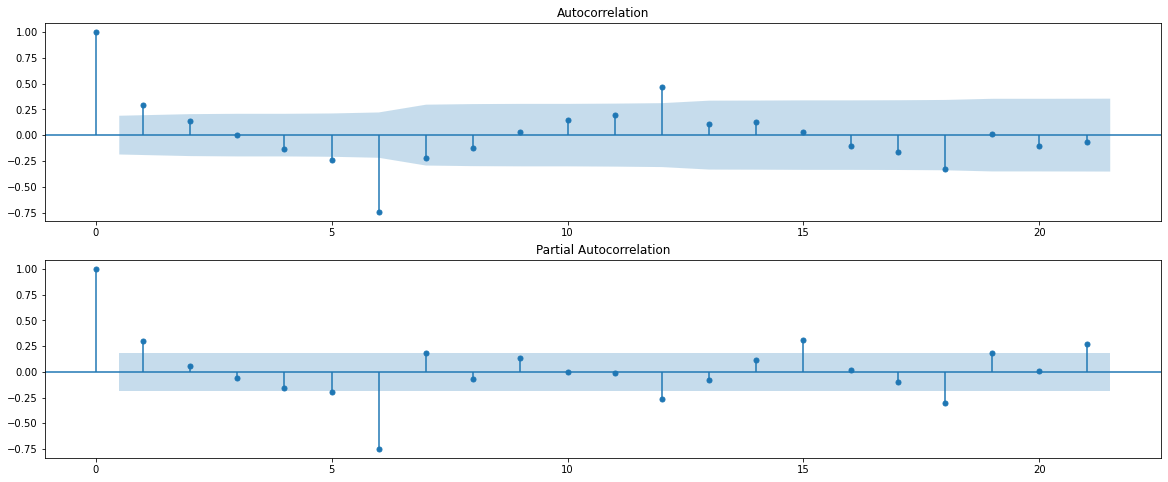

In [58]:
fig,ax = plt.subplots(2,1,figsize=(20,8))
fig = sm.graphics.tsa.plot_acf(x_diff_6.dropna(), ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(x_diff_6.dropna(), ax=ax[1])

plt.show()

#### `Identification, estimmation et vérification des modèles potentiels`

- **Modèle 1**

Considérons le modèle $SARIMA(1,1,1)(1,1,1)_{6}$

In [59]:
from statsmodels.tsa.statespace.sarimax import *
from statsmodels.stats.diagnostic import acorr_ljungbox

model1 = SARIMAX(np.asarray(x), order=(1,1,1), seasonal_order=(1,1,1,6))
results1 = model1.fit()
residus1 = results1.resid
print(results1.summary())

print('\nTEST DE JUNG-BOX - (Test de blancheur)\n\nRetard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results1.resid, lags=elt)[1].mean()))

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  115
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 6)   Log Likelihood                -959.174
Date:                           Thu, 07 Oct 2021   AIC                           1928.348
Time:                                   18:15:13   BIC                           1941.758
Sample:                                        0   HQIC                          1933.785
                                           - 115                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1052      0.317      0.332      0.740      -0.516       0.727
ma.L1         -0.2843      0.306     -0.930

Certains paramètres du modèle ne sont pas significatifs.

- **Modèle 2**

Considérons le modèle $SARIMA(1,1,0)(1,1,1)_{6}$

In [60]:
model2 = SARIMAX(np.asarray(x), order=(1,1,0), seasonal_order=(1,1,1,6))
results2 = model2.fit()
residus2 = results2.resid
print(results2.summary())

print('\nTEST DE JUNG-BOX - (Test de blancheur)\n\nRetard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results2.resid, lags=elt)[1].mean()))

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  115
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 6)   Log Likelihood                -959.355
Date:                             Thu, 07 Oct 2021   AIC                           1926.710
Time:                                     18:15:14   BIC                           1937.439
Sample:                                          0   HQIC                          1931.060
                                             - 115                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1691      0.049     -3.429      0.001      -0.266      -0.072
ar.S.L6        0.1067      

Dans ce modèle, tous les paramètres sont significatifs au seuil de  5%. 

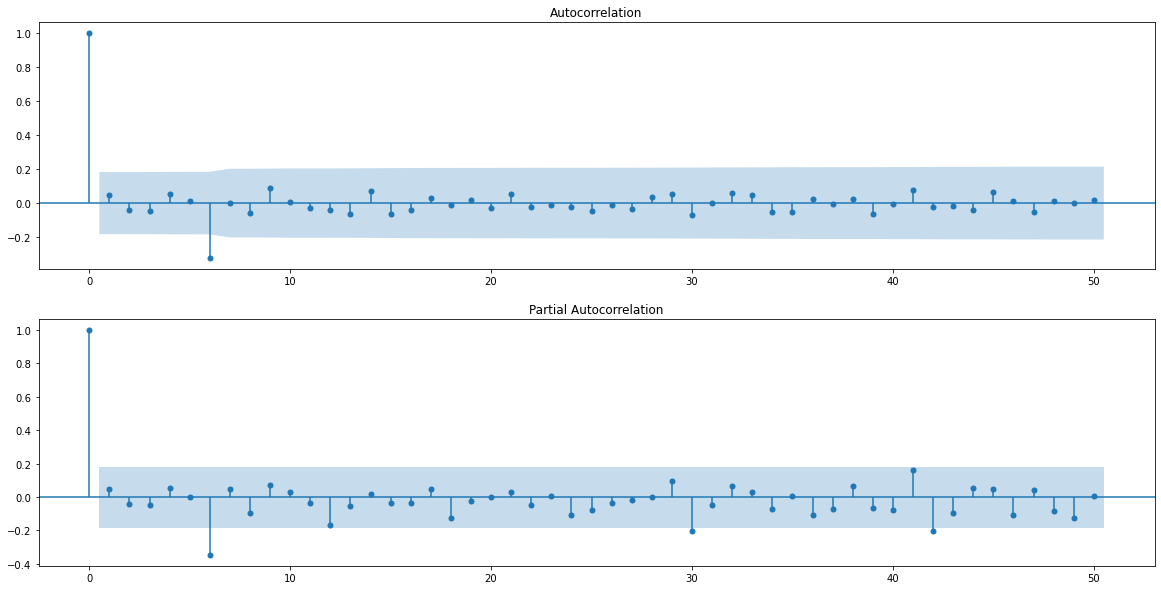

In [61]:
fig, ax = plt.subplots(2,1,figsize=(20,10))
fig = sm.graphics.tsa.plot_acf(residus2, lags=50, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(residus2, lags=50, ax=ax[1])
plt.show()

Les tests de significativité des paramètres et de blancheur du résidu sont validés au **niveau 5%**. De plus, sur les graphiques ACF et PACF des résidus, il n'y a pas de pics fortement significatifs.

In [62]:
from scipy.stats import shapiro
# test de normalité des résidus
shapiro(results2.resid)

ShapiroResult(statistic=0.523569643497467, pvalue=1.223731908109623e-17)

Le test de normalité est également validé pour le modèle.

Cependant, nous allons diagnostiquer en profondeur le modèle. Pour cela, nous allons voir les différents graphiques sur les résidus.

In [63]:
## fonction pour le diagnostique des résidus
def plot_diagnostics(sarima_res, variable=0, lags=10, fig=None, figsize=None):
        return type(sarima_res.plot_diagnostics(variable, lags, fig, figsize))

matplotlib.figure.Figure

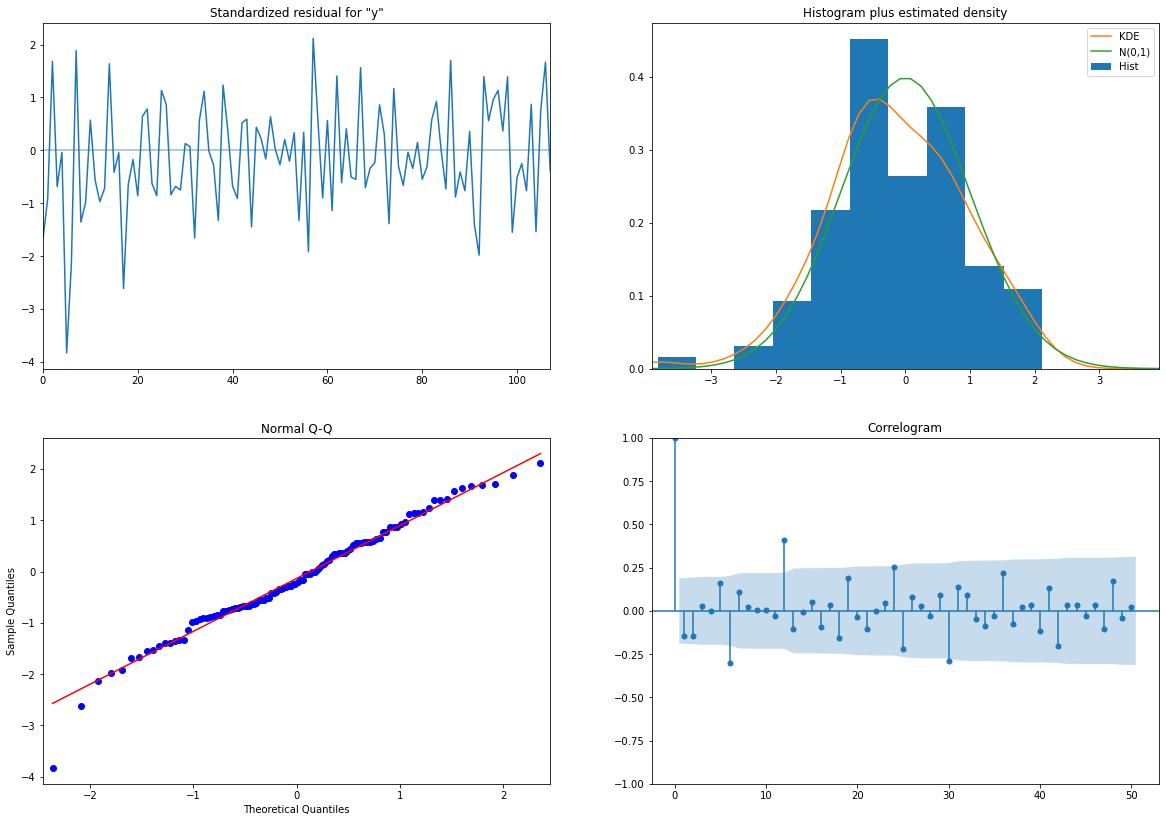

In [64]:
plot_diagnostics(sarima_res = results2, figsize=(20,14), lags=50)

Ces différents graphiques montrent que les résidus sont des `bruits blancs`. Nous avons donc choisi de travailler avec ce dernier modèle.

- **`Prévision du modèle retenu sur l'année 2020`**

In [65]:
## ajustement du modèle sur les données Test
train_mod = SARIMAX(np.asarray(y_train), order=(1,1,0), seasonal_order=(1,1,1,6))
results = train_mod.fit()
residus = results.resid
print(results.summary())

print('\nTEST DE JUNG-BOX - (Test de blancheur)\n\nRetard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(results.resid, lags=elt)[1].mean()))

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   96
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 6)   Log Likelihood                 158.245
Date:                             Thu, 07 Oct 2021   AIC                           -308.489
Time:                                     18:15:15   BIC                           -298.535
Sample:                                          0   HQIC                          -304.477
                                              - 96                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4400      0.085     -5.199      0.000      -0.606      -0.274
ar.S.L6       -0.4923      

In [66]:
print("\nTEST DE SHAPIRO (normalité des résidus)\n",shapiro(results.resid))


TEST DE SHAPIRO (normalité des résidus)
 ShapiroResult(statistic=0.16281181573867798, pvalue=6.995804098071939e-21)


Le modèle est significatif sur les données d'apprentissage(données 2012-2019).

Nous allons faire la prédiction sur l'année 2020.

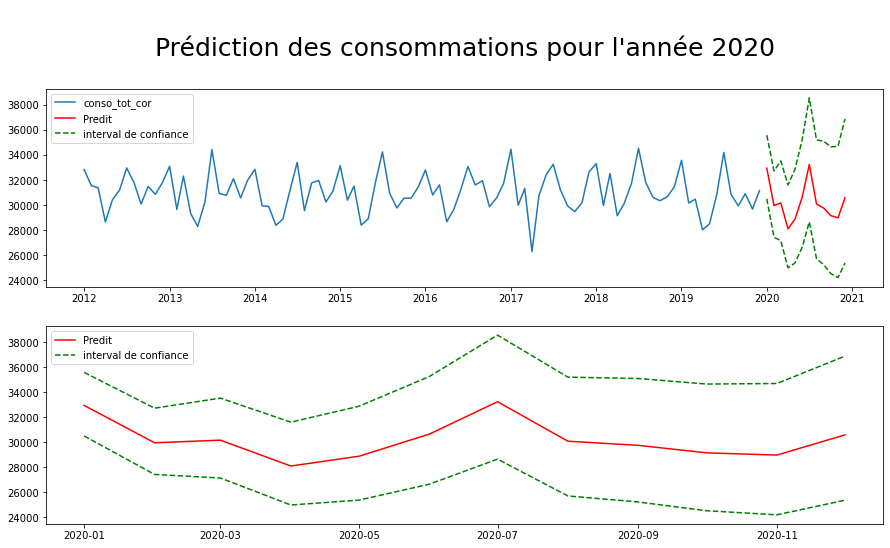

In [67]:
pred_model = results.get_forecast(12)
pred = pred_model.predicted_mean
pred_ic = pred_model.conf_int(alpha=0.05)

pred_l = [elt[0] for elt in pred_model.conf_int(alpha=0.05)]
pred_u = [elt[1] for elt in pred_model.conf_int(alpha=0.05)]

plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(x_train, label='conso_tot_cor')
plt.plot(y_test.index, np.exp(pred), color='r', label='Predit')

plt.plot(y_test.index, np.exp(pred_ic[:,0]), color='g', linestyle='--',label="interval de confiance")
plt.plot(y_test.index, np.exp(pred_ic[:,1]), color='g', linestyle='--')
plt.title("\nPrédiction des consommations pour l'année 2020\n", fontsize=25)
plt.legend()

## Zoom sur la période de prédiction
plt.subplot(212)
plt.plot(y_test.index, np.exp(pred), color='r', label='Predit')
plt.plot(y_test.index, np.exp(pred_ic[:,0]), color='g', linestyle='--',label="interval de confiance")
plt.plot(y_test.index, np.exp(pred_ic[:,1]), color='g', linestyle='--')
plt.legend()
plt.show()

- **`Analyse a posteriori`**

Nous allons tronquer la série pour l'année 2019 et faire une prévision par la suite à l'aide de l'historique.

In [68]:
df_final[:"2019"]["conso_tot_cor"]

Mois
2012-01-01    32816.619609
2012-02-01    31532.775823
2012-03-01    31363.777510
2012-04-01    28630.841732
2012-05-01    30394.037467
                  ...     
2019-08-01    30840.636711
2019-09-01    29919.378022
2019-10-01    30895.928364
2019-11-01    29661.122097
2019-12-01    31145.333946
Name: conso_tot_cor, Length: 96, dtype: float64

In [69]:
x_tronc = x[:"2018"]
y_tronc = np.log(x_tronc)
x_a_prevoir = x["2019"]

Vérifions si notre modèle est toujours valide sur les données tronquées.

In [70]:
modeltronc = SARIMAX(np.asarray(y_tronc), order=(1,1,0), seasonal_order=(1,1,1,6))
resultstronc = modeltronc.fit()
print(resultstronc.summary())

print('Retard : p-value')
for elt in [6, 12, 18, 24, 30, 36]:
    print('{} : {}'.format(elt, acorr_ljungbox(resultstronc.resid, lags=elt)[1].mean()))
    
shapiro(resultstronc.resid)

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   84
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 6)   Log Likelihood                 134.949
Date:                             Thu, 07 Oct 2021   AIC                           -261.899
Time:                                     18:15:16   BIC                           -252.524
Sample:                                          0   HQIC                          -258.149
                                              - 84                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4361      0.086     -5.074      0.000      -0.604      -0.268
ar.S.L6       -0.4377      

ShapiroResult(statistic=0.17701762914657593, pvalue=1.7564391901042203e-19)

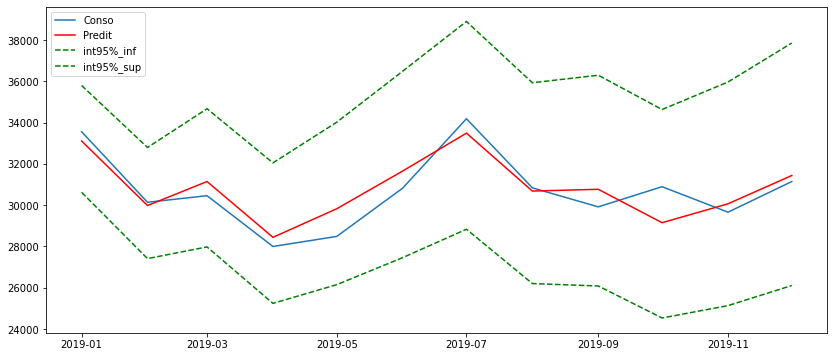

In [71]:
pred_modeltronc = resultstronc.get_forecast(12)
pred_tronc = np.exp(pred_modeltronc.predicted_mean)
pred_l_tronc = [np.exp(elt[0]) for elt in pred_modeltronc.conf_int(alpha=0.05)]
pred_u_tronc = [np.exp(elt[1]) for elt in pred_modeltronc.conf_int(alpha=0.05)]

plt.figure(figsize=(14,6))
plt.plot(x_a_prevoir, label='Conso')
plt.plot(x_a_prevoir.index, pred_tronc, color='r', label='Predit')
plt.plot(x_a_prevoir.index, pred_l_tronc, color='g', linestyle='--', label='int95%_inf')
plt.plot(x_a_prevoir.index, pred_u_tronc, color='g', linestyle='--', label='int95%_sup')
plt.legend()
plt.show()

Nous allons calculer les métrics comme dans le premier cas de prévision. Ces paramètres vont être calculés sur le modèle prédit 2020 ci-haut.

In [72]:
df_metrics_SARIMA = prin_metrics(np.exp(y_test), np.exp(pred))
df_metrics_SARIMA

,Métrique,Résultats
0,MAE,1.358747e+03
1,MSE,3.228260e+06
2,RMSE,1.796736e+03
3,MAPE,4.984662e+00
4,R²,4.063077e-01
